# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

cities_df = pd.read_csv('/Users/jordancks/Python-API-Challenge/cities.csv')

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hadibu
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | duncan town
City not found. Skipping...
Processing Record 5 of Set 1 | suva
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | fontanelas
Processing Record 9 of Set 1 | azadshahr
Processing Record 10 of Set 1 | kupang
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | northam
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | malyn
Processing Record 18 of Set 1 | vryheid
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | kodia

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hadibu,12.6500,54.0333,28.80,64,100,13.34,YE,1720084191
1,lata,40.1629,-8.3327,29.16,44,4,1.49,PT,1720084192
2,bilibino,68.0546,166.4372,20.88,50,85,1.32,RU,1720084194
3,suva,-18.1416,178.4415,24.71,94,75,1.03,FJ,1720084197
4,blackmans bay,-43.0167,147.3167,6.52,84,5,0.45,AU,1720084198


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,28.80,64,100,13.34,YE,1720084191
1,lata,40.1629,-8.3327,29.16,44,4,1.49,PT,1720084192
2,bilibino,68.0546,166.4372,20.88,50,85,1.32,RU,1720084194
3,suva,-18.1416,178.4415,24.71,94,75,1.03,FJ,1720084197
4,blackmans bay,-43.0167,147.3167,6.52,84,5,0.45,AU,1720084198


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

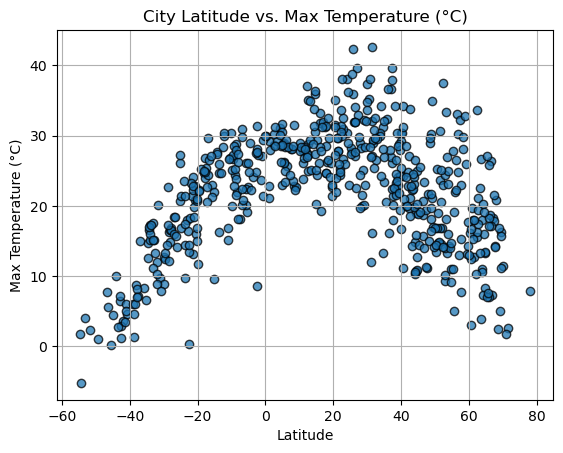

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

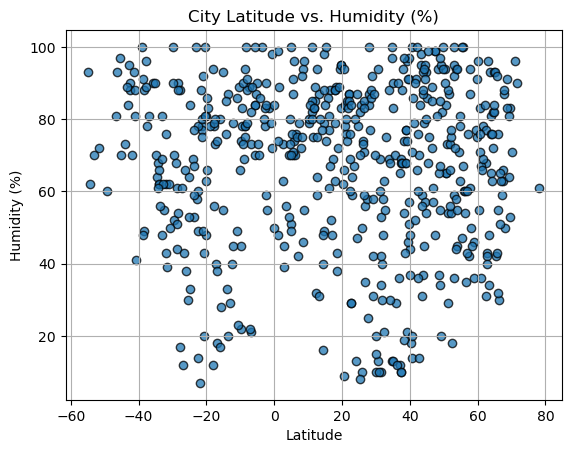

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

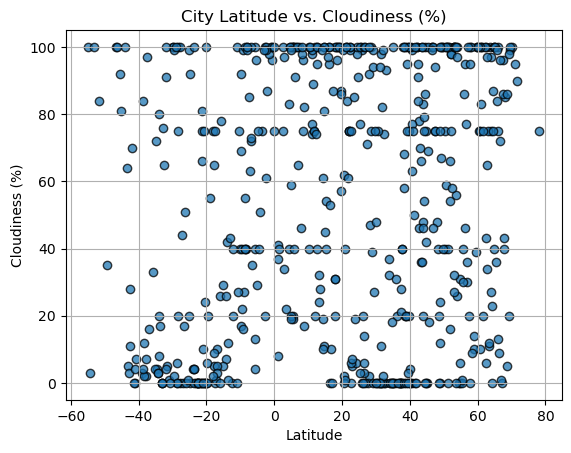

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

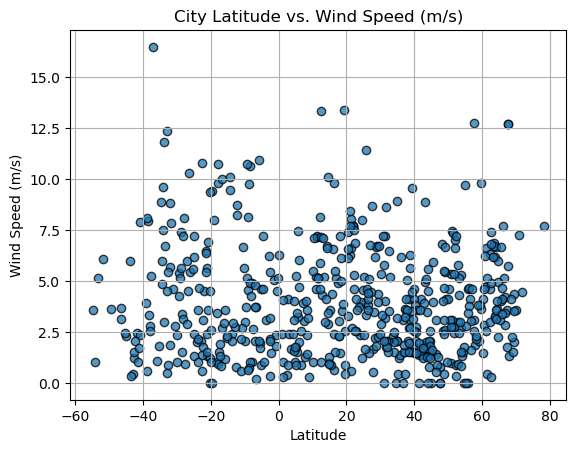

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.75, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.75)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate plot with the linear equation
    plt.annotate(line_eq, (min(x_values) + 1, max(y_values) - 1), fontsize=15, color="red")

    # Incorporate other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hadibu,12.6500,54.0333,28.80,64,100,13.34,YE,1720084191
1,lata,40.1629,-8.3327,29.16,44,4,1.49,PT,1720084192
2,bilibino,68.0546,166.4372,20.88,50,85,1.32,RU,1720084194
6,fontanelas,38.8472,-9.4372,22.57,77,20,5.66,PT,1720084201
7,azadshahr,34.7909,48.5707,31.27,13,0,2.06,IR,1720084203


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,suva,-18.1416,178.4415,24.71,94,75,1.03,FJ,1720084197
4,blackmans bay,-43.0167,147.3167,6.52,84,5,0.45,AU,1720084198
5,waitangi,-43.9535,-176.5597,10.01,73,100,5.96,NZ,1720084200
8,kupang,-10.1667,123.5833,30.32,66,40,5.66,ID,1720084205
9,port elizabeth,-33.9180,25.5701,17.28,62,20,11.83,ZA,1720084206


###  Temperature vs. Latitude Linear Regression Plot

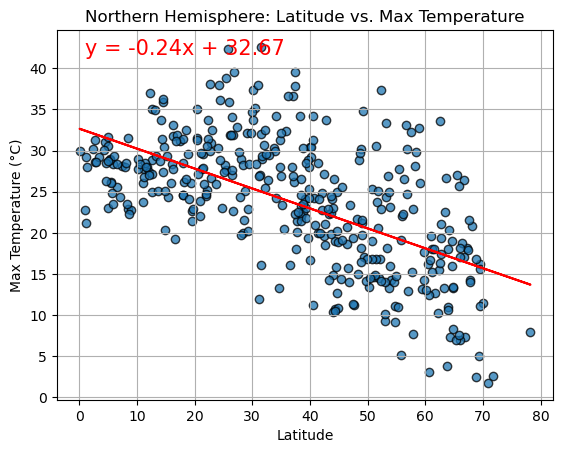

In [46]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Northern Hemisphere: Latitude vs. Max Temperature", 
    "output_data/Fig_NH_Lat_vs_MaxTemp.png"
)

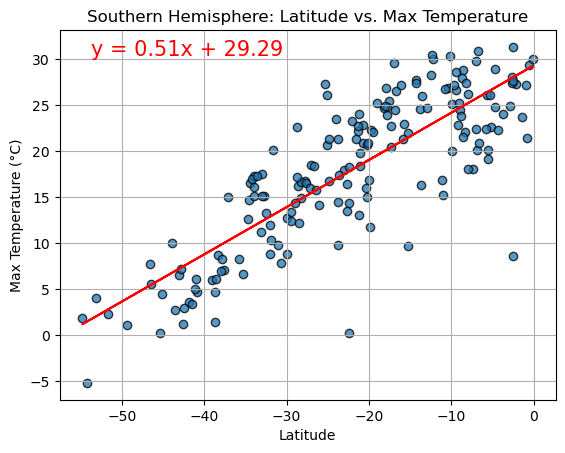

In [47]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude", 
    "Max Temperature (°C)", 
    "Southern Hemisphere: Latitude vs. Max Temperature", 
    "output_data/Fig_SH_Lat_vs_MaxTemp.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE 

In [48]:
#There's a negative linear relationship between latitude and maximun tempreture in the Northern hemisphere. This is because as we move from the equator towards higher latitude, the tempreture tend to decrease due to the decrease sunlight and the angle of the sunlight as latitude increase. Similarly, this is mirrored for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

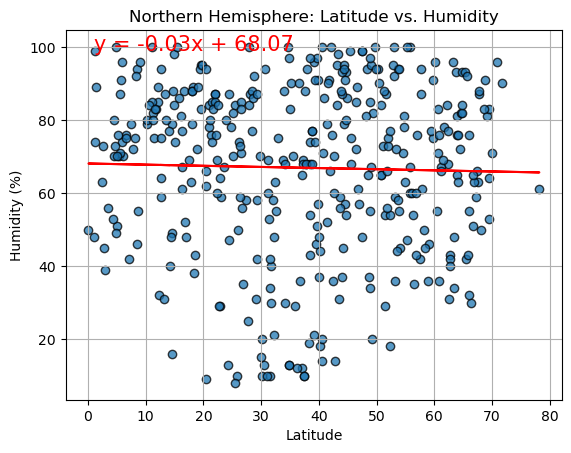

In [50]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Northern Hemisphere: Latitude vs. Humidity", 
    "output_data/Fig_NH_Lat_vs_Humidity.png"
)

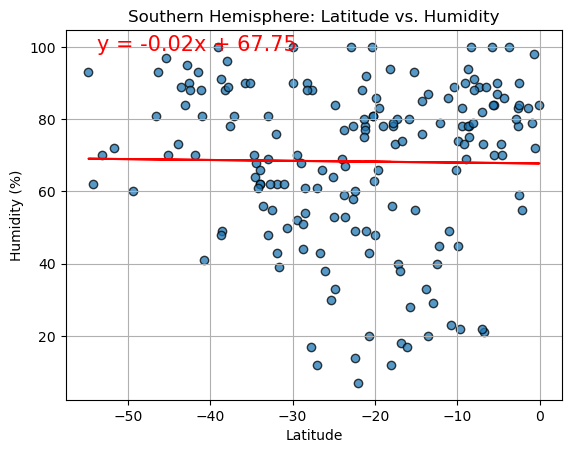

In [51]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude", 
    "Humidity (%)", 
    "Southern Hemisphere: Latitude vs. Humidity", 
    "output_data/Fig_SH_Lat_vs_Humidity.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [52]:
# There's a slight negative linaer relationship between latitude and humidity for both hemisphere. This is because humidity tends to decrease as we move away from the warmer equator regions.

### Cloudiness vs. Latitude Linear Regression Plot

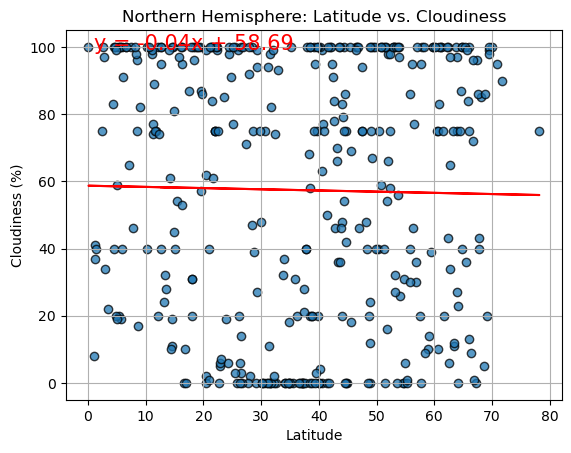

In [53]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Northern Hemisphere: Latitude vs. Cloudiness", 
    "output_data/Fig_NH_Lat_vs_Cloudiness.png"
)

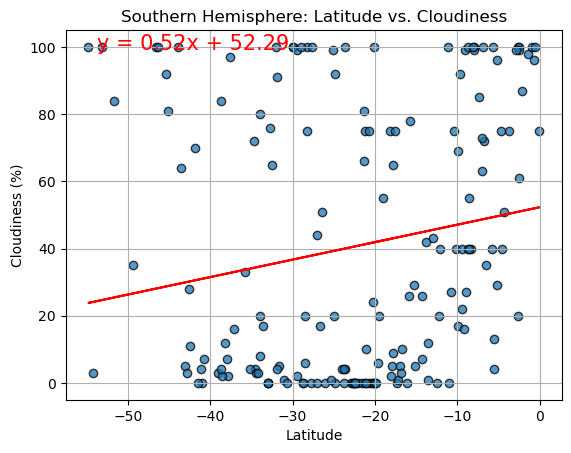

In [56]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Southern Hemisphere: Latitude vs. Cloudiness", 
    "output_data/Fig_SH_Lat_vs_Cloudiness.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Cloudiness can be influence by various local factors such as topography of a city/region. 
# Based on the results, Nothern Hemisphere has a slight begative relationship and Southern Hemisphere has a positive relationship between Latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

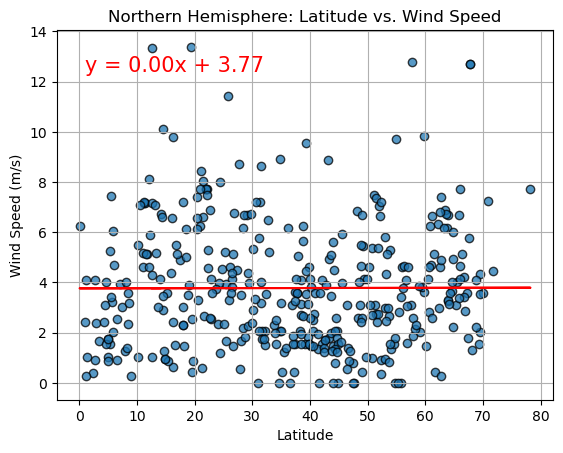

In [57]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Northern Hemisphere: Latitude vs. Wind Speed", 
    "output_data/Fig_NH_Lat_vs_WindSpeed.png"
)

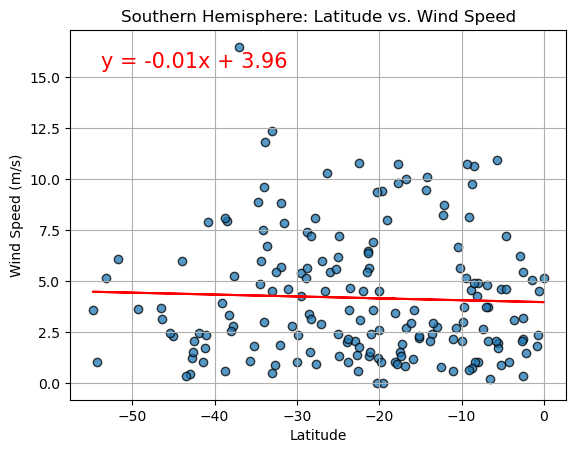

In [58]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (m/s)", 
    "Southern Hemisphere: Latitude vs. Wind Speed", 
    "output_data/Fig_SH_Lat_vs_WindSpeed.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Based on the results, wind speed for both nothern and southern hemisphere has no strong linear relationship.
# This means wind speed is not dependent on latitude alone but also on other factors